### Preprocessing the Data for a Neural Network

In [471]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint
import os
import numpy as np
import matplotlib.pyplot as plt
from keras import regularizers

# Callback file path
os.makedirs("checkpoints2/", exist_ok=True)
checkpoint_path = "checkpoints2/weights.{epoch:02d}.hdf5"

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("Resources/charity_data.csv")
application_df.head(20)

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1
5,10556855,MINORITY ORGAN & TISSUE TRANSPLANT & EDUCATION...,T3,Independent,C1200,Preservation,Trust,1,0,N,5000,1
6,10558440,FRIENDS OF ARTS COUNCIL OF GREATER DENHAM SPRI...,T3,Independent,C1000,Preservation,Trust,1,100000-499999,N,31452,1
7,10566033,ISRAEL EMERGENCY ALLIANCE,T3,Independent,C2000,Preservation,Trust,1,10M-50M,N,7508025,1
8,10570430,ARAMCO BRATS INC,T7,Independent,C1000,ProductDev,Trust,1,1-9999,N,94389,1
9,10571689,INTERNATIONAL ASSOCIATION OF FIRE FIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0


In [472]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df = application_df.drop(columns=["EIN", "NAME"],axis=1)
application_df.head(2)

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1


In [473]:
# Determine the number of unique values in each column.
application_df.nunique()

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [474]:
income_counts = application_df.INCOME_AMT.value_counts()
income_counts

0                24388
25000-99999       3747
100000-499999     3374
1M-5M              955
1-9999             728
10000-24999        543
10M-50M            240
5M-10M             185
50M+               139
Name: INCOME_AMT, dtype: int64

In [475]:
# Determine which values to replace if counts are less than ...?
replace_INCOME_AMT = list(income_counts[income_counts < 500].index)

# Replace in dataframe
for app in replace_INCOME_AMT:
    application_df.INCOME_AMT = application_df.INCOME_AMT.replace(app,"Other")
    
# Check to make sure binning was successful
application_df.INCOME_AMT.value_counts()

0                24388
25000-99999       3747
100000-499999     3374
1M-5M              955
1-9999             728
Other              564
10000-24999        543
Name: INCOME_AMT, dtype: int64

In [476]:
affiliation_counts = application_df.AFFILIATION.value_counts()
affiliation_counts

Independent         18480
CompanySponsored    15705
Family/Parent          64
National               33
Regional               13
Other                   4
Name: AFFILIATION, dtype: int64

<AxesSubplot:ylabel='Density'>

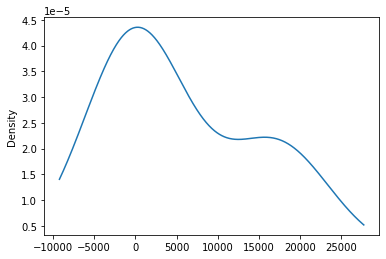

In [477]:
# Visualize the value counts of AFFILIATION
affiliation_counts.plot.density()

In [478]:
# Determine which values to replace if counts are less than ...?
replace_affiliation = list(affiliation_counts[affiliation_counts < 500].index)

# Replace in dataframe
for app in replace_affiliation:
    application_df.AFFILIATION = application_df.AFFILIATION.replace(app,"Other")
    
# Check to make sure binning was successful
application_df.AFFILIATION.value_counts()

Independent         18480
CompanySponsored    15705
Other                 114
Name: AFFILIATION, dtype: int64

In [479]:
# Look at APPLICATION_TYPE value counts for binning
app_type_counts = application_df.APPLICATION_TYPE.value_counts()
app_type_counts

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

<AxesSubplot:ylabel='Density'>

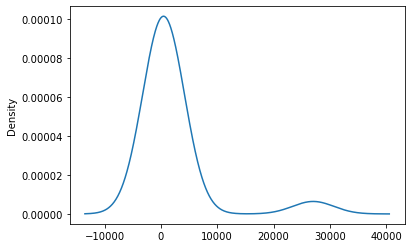

In [480]:
# Visualize the value counts of APPLICATION_TYPE
app_type_counts.plot.density()

In [481]:
# Determine which values to replace if counts are less than ...?
replace_application = list(app_type_counts[app_type_counts < 700].index)

# Replace in dataframe
for app in replace_application:
    application_df.APPLICATION_TYPE = application_df.APPLICATION_TYPE.replace(app,"Other")
    
# Check to make sure binning was successful
application_df.APPLICATION_TYPE.value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
Other      804
T8         737
T7         725
Name: APPLICATION_TYPE, dtype: int64

In [482]:
# Look at CLASSIFICATION value counts for binning
app_class_count = application_df.CLASSIFICATION.value_counts()
app_class_count

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64

<AxesSubplot:ylabel='Density'>

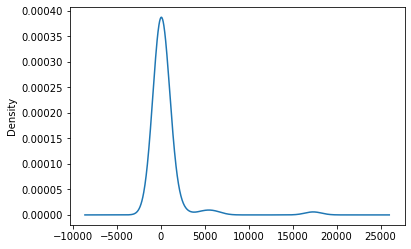

In [483]:
# Visualize the value counts of CLASSIFICATION
app_class_count.plot.density()

In [484]:
# Determine which values to replace if counts are less than ..?
replace_class = list(app_class_count[app_class_count < 700].index)

# Replace in dataframe
for cls in replace_class:
    application_df.CLASSIFICATION = application_df.CLASSIFICATION.replace(cls,"Other")
    
# Check to make sure binning was successful
application_df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
Other     1484
C7000      777
Name: CLASSIFICATION, dtype: int64

In [485]:
# Generate our categorical variable lists
application_cat = application_df.dtypes[application_df.dtypes == "object"].index.tolist()
application_cat

['APPLICATION_TYPE',
 'AFFILIATION',
 'CLASSIFICATION',
 'USE_CASE',
 'ORGANIZATION',
 'INCOME_AMT',
 'SPECIAL_CONSIDERATIONS']

In [486]:
application_cat = application_df.dtypes[application_df.dtypes == "object"].index.tolist()
application_cat

['APPLICATION_TYPE',
 'AFFILIATION',
 'CLASSIFICATION',
 'USE_CASE',
 'ORGANIZATION',
 'INCOME_AMT',
 'SPECIAL_CONSIDERATIONS']

In [487]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(application_df[application_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(application_cat)
encode_df.head()

C:\Users\bkuro\Anaconda3\envs\Test\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,APPLICATION_TYPE_Other,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,AFFILIATION_CompanySponsored,AFFILIATION_Independent,...,ORGANIZATION_Trust,INCOME_AMT_0,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_Other,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [488]:
# Merge one-hot encoded features and drop the originals
application_df2 = application_df.merge(encode_df, left_index=True, right_index=True)
application_df2 = application_df2.drop(columns = application_cat)
#application_df = application_df.drop(columns = ["ASK_AMT"])# df.drop(columns =['C', 'D'])
application_df2.head()

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,...,ORGANIZATION_Trust,INCOME_AMT_0,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_Other,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,108590,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,5000,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,6692,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,142590,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [489]:
# Split our preprocessed data into our features and target arrays
X = application_df2.drop(["IS_SUCCESSFUL"],1).values
y = application_df2["IS_SUCCESSFUL"].values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=37)

C:\Users\bkuro\AppData\Local\Temp\ipykernel_23376\1576008551.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = application_df2.drop(["IS_SUCCESSFUL"],1).values


In [490]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [491]:
X_train_scaled

array([[ 0.01394306, -0.03308813, -0.15453656, ..., -0.13207025,
         0.02991499, -0.02991499],
       [ 0.01394306, -0.03308813, -0.15453656, ..., -0.13207025,
         0.02991499, -0.02991499],
       [ 0.01394306, -0.03303585, -0.15453656, ..., -0.13207025,
         0.02991499, -0.02991499],
       ...,
       [ 0.01394306, -0.03308813, -0.15453656, ..., -0.13207025,
         0.02991499, -0.02991499],
       [ 0.01394306, -0.03308813, -0.15453656, ..., -0.13207025,
         0.02991499, -0.02991499],
       [ 0.01394306, -0.01211815, -0.15453656, ..., -0.13207025,
         0.02991499, -0.02991499]])

### Deliverable 2: Compile, Train and Evaluate the Model

In [573]:
# MODEL ONE
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
#   , kernel_regularizer=regularizers.l2(0.01)

number_input_features = len(X_train[0])
hidden_nodes_layer1 = 80   #15
hidden_nodes_layer2 = 50   #5
hidden_nodes_layer3 = 20

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features,activation='relu', kernel_regularizer=regularizers.l2(0.01))
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu", kernel_regularizer=regularizers.l2(0.01)))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu", kernel_regularizer=regularizers.l2(0.01)))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

#opt = tf.keras.optimizers.SGD(learning_rate=0.05, momentum=0.9)

# Check the structure of the model
nn.summary()

Model: "sequential_50"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_178 (Dense)            (None, 80)                3120      
_________________________________________________________________
dense_179 (Dense)            (None, 50)                4050      
_________________________________________________________________
dense_180 (Dense)            (None, 20)                1020      
_________________________________________________________________
dense_181 (Dense)            (None, 1)                 21        
Total params: 8,211
Trainable params: 8,211
Non-trainable params: 0
_________________________________________________________________


In [574]:
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-2,
    decay_steps=10000,
    decay_rate=0.9)
#optimizer = keras.optimizers.SGD(learning_rate=lr_schedule)
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer=
           tf.keras.optimizers.Adam(
    learning_rate=0.001,
    beta_1=0.9,
    beta_2=0.99,
    epsilon=1e-07,
    amsgrad=False,
    name="Adam") ,metrics=["accuracy"])

#nn.compile(loss='loss_mean_squared_logarithmic_error', optimizer=opt,metrics=["accuracy"])
#nn.compile(optimizer='sgd',
#              loss=tf.keras.losses.MeanSquaredLogarithmicError(),metrics=["accuracy"])

In [575]:
# Create a callback, saving the weights every 5 epochs
cp_callback = ModelCheckpoint(
    filepath = checkpoint_path,
    verbose = 1,
    save_weights_only=True,
    save_freq = 'epoch')

In [576]:
# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs = 100, callbacks=[cp_callback])

Epoch 1/100
804/804 [==============================] - 3s 3ms/step - loss: 0.8176 - accuracy: 0.7200

Epoch 00001: saving model to checkpoints2\weights.01.hdf5
Epoch 2/100
804/804 [==============================] - 2s 3ms/step - loss: 0.5943 - accuracy: 0.7269

Epoch 00002: saving model to checkpoints2\weights.02.hdf5
Epoch 3/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5865 - accuracy: 0.7273

Epoch 00003: saving model to checkpoints2\weights.03.hdf5
Epoch 4/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5840 - accuracy: 0.7282

Epoch 00004: saving model to checkpoints2\weights.04.hdf5
Epoch 5/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5818 - accuracy: 0.7264

Epoch 00005: saving model to checkpoints2\weights.05.hdf5
Epoch 6/100
804/804 [==============================] - 2s 3ms/step - loss: 0.5803 - accuracy: 0.7294

Epoch 00006: saving model to checkpoints2\weights.06.hdf5
Epoch 7/100
804/804 [===================

804/804 [==============================] - 2s 3ms/step - loss: 0.5678 - accuracy: 0.7297

Epoch 00052: saving model to checkpoints2\weights.52.hdf5
Epoch 53/100
804/804 [==============================] - 2s 3ms/step - loss: 0.5669 - accuracy: 0.7290

Epoch 00053: saving model to checkpoints2\weights.53.hdf5
Epoch 54/100
804/804 [==============================] - 3s 4ms/step - loss: 0.5671 - accuracy: 0.7301

Epoch 00054: saving model to checkpoints2\weights.54.hdf5
Epoch 55/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5672 - accuracy: 0.7295

Epoch 00055: saving model to checkpoints2\weights.55.hdf5
Epoch 56/100
804/804 [==============================] - 2s 3ms/step - loss: 0.5672 - accuracy: 0.7297

Epoch 00056: saving model to checkpoints2\weights.56.hdf5
Epoch 57/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5672 - accuracy: 0.7308

Epoch 00057: saving model to checkpoints2\weights.57.hdf5
Epoch 58/100
804/804 [=========================

In [577]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 1s - loss: 0.5810 - accuracy: 0.7229
Loss: 0.580965518951416, Accuracy: 0.7229154706001282


In [579]:
# MODEL TWO
from tensorflow.keras.layers import LeakyReLU
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 80   #15
hidden_nodes_layer2 = 50   #5
hidden_nodes_layer3 = 20

nn2 = tf.keras.models.Sequential()
#nn.add(LeakyReLU(alpha=0.05))

# Leaky addition
nn2.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation=tf.keras.layers.LeakyReLU(alpha=0.2))
)
# Second hidden layer
nn2.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer2, activation=tf.keras.layers.LeakyReLU(alpha=0.1))
)

# Third hidden layer
nn2.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer3, activation=tf.keras.layers.LeakyReLU(alpha=0.3))
)
# Output layer
nn2.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn2.summary()

Model: "sequential_52"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_186 (Dense)            (None, 80)                3120      
_________________________________________________________________
dense_187 (Dense)            (None, 50)                4050      
_________________________________________________________________
dense_188 (Dense)            (None, 20)                1020      
_________________________________________________________________
dense_189 (Dense)            (None, 1)                 21        
Total params: 8,211
Trainable params: 8,211
Non-trainable params: 0
_________________________________________________________________


In [417]:
# Compile the second model
nn2.compile(loss="binary_crossentropy", optimizer="adam",metrics=["accuracy"])

In [418]:
# Create a callback, saving the weights every 5 epochs
cp_callback = ModelCheckpoint(
    filepath = checkpoint_path,
    verbose = 1,
    save_weights_only=True,
    save_freq = 'epoch')

In [429]:
# Train the second model
fit_model2 = nn2.fit(X_train_scaled,y_train,epochs = 10, callbacks=[cp_callback])

Epoch 1/10
804/804 [==============================] - 1s 2ms/step - loss: 0.5369 - accuracy: 0.7399

Epoch 00001: saving model to checkpoints2\weights.01.hdf5
Epoch 2/10
804/804 [==============================] - 1s 2ms/step - loss: 0.5370 - accuracy: 0.7390

Epoch 00002: saving model to checkpoints2\weights.02.hdf5
Epoch 3/10
804/804 [==============================] - 1s 2ms/step - loss: 0.5366 - accuracy: 0.7390

Epoch 00003: saving model to checkpoints2\weights.03.hdf5
Epoch 4/10
804/804 [==============================] - 1s 2ms/step - loss: 0.5368 - accuracy: 0.7397

Epoch 00004: saving model to checkpoints2\weights.04.hdf5
Epoch 5/10
804/804 [==============================] - 1s 2ms/step - loss: 0.5362 - accuracy: 0.7394

Epoch 00005: saving model to checkpoints2\weights.05.hdf5
Epoch 6/10
804/804 [==============================] - 1s 2ms/step - loss: 0.5368 - accuracy: 0.7391

Epoch 00006: saving model to checkpoints2\weights.06.hdf5
Epoch 7/10
804/804 [==========================

In [430]:
# Evaluate the model using the test datad,y_test,verbose=2)
model_loss, model_accuracy = nn2.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5545 - accuracy: 0.7269
Loss: 0.5545340180397034, Accuracy: 0.7268804907798767


In [422]:
# MODEL THREE

# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 80   #15
hidden_nodes_layer2 = 30   #5
hidden_nodes_layer3 = 20

nn3 = tf.keras.models.Sequential()

# Leaky addition
nn3.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)
# Second hidden layer
nn3.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="tanh")
)
# Thrid hidden layer
nn3.add(
    tf.keras.layers.Dense(units=20, activation=tf.keras.layers.LeakyReLU(alpha=0.2))
)

# Output layer
nn3.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn3.summary()

Model: "sequential_29"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_103 (Dense)            (None, 80)                3120      
_________________________________________________________________
dense_104 (Dense)            (None, 30)                2430      
_________________________________________________________________
dense_105 (Dense)            (None, 20)                620       
_________________________________________________________________
dense_106 (Dense)            (None, 1)                 21        
Total params: 6,191
Trainable params: 6,191
Non-trainable params: 0
_________________________________________________________________


In [423]:
# Compile the second model
nn3.compile(loss="binary_crossentropy", optimizer="adam",metrics=["accuracy"])

In [424]:
# Create a callback, saving the weights every 5 epochs
cp_callback = ModelCheckpoint(
    filepath = checkpoint_path,
    verbose = 1,
    save_weights_only=True,
    save_freq = 'epoch')

In [427]:
# Train the model
fit_model = nn3.fit(X_train_scaled,y_train,epochs = 10, callbacks=[cp_callback])

Epoch 1/10
804/804 [==============================] - 1s 1ms/step - loss: 0.5347 - accuracy: 0.7409

Epoch 00001: saving model to checkpoints2\weights.01.hdf5
Epoch 2/10
804/804 [==============================] - 1s 2ms/step - loss: 0.5341 - accuracy: 0.7401

Epoch 00002: saving model to checkpoints2\weights.02.hdf5
Epoch 3/10
804/804 [==============================] - 1s 1ms/step - loss: 0.5342 - accuracy: 0.7377

Epoch 00003: saving model to checkpoints2\weights.03.hdf5
Epoch 4/10
804/804 [==============================] - 1s 1ms/step - loss: 0.5341 - accuracy: 0.7402

Epoch 00004: saving model to checkpoints2\weights.04.hdf5
Epoch 5/10
804/804 [==============================] - 2s 2ms/step - loss: 0.5338 - accuracy: 0.7405

Epoch 00005: saving model to checkpoints2\weights.05.hdf5
Epoch 6/10
804/804 [==============================] - 2s 2ms/step - loss: 0.5340 - accuracy: 0.7396

Epoch 00006: saving model to checkpoints2\weights.06.hdf5
Epoch 7/10
804/804 [==========================

In [428]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn3.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5573 - accuracy: 0.7245
Loss: 0.5572587847709656, Accuracy: 0.7245481014251709


In [ ]:
plotter = tfdocs.plots.HistoryPlotter(metric = 'binary_crossentropy', smoothing_std=10)
plotter.plot(size_histories)
plt.ylim([0.5, 0.7])